In [1]:
import pandas as pd
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import SnowballStemmer

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
resumes = pd.read_csv("Resume.csv")

In [4]:
resumes = resumes[["ID", "Resume_str","Resume_html","Category"]]

# resumes.dropna(subset=['Category'], inplace=True)
resumes.head()
# resumes_clean = resumes

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
from bs4 import BeautifulSoup

Field = [['Experience','History'], ['Summary','Overview','Profile'], ['Education','Qualifications'], ['Skills']]

resumes['Experience'] = [None] * len(resumes)
resumes['Summary'] = [None] * len(resumes)
resumes['Education'] = [None] * len(resumes)
resumes['Skills'] = [None] * len(resumes)
print(len(resumes))
for j in range(4):
    for i in range(len(resumes)):
        html_content = resumes['Resume_html'][i]
        soup = BeautifulSoup(str(html_content), 'html.parser')
        div_with_text = soup.find('div', string=lambda text: text and any(field_value.lower() in text.strip().lower() for field_value in Field[j]))

        if div_with_text:
            sibling_div = div_with_text.find_next('div')
            if sibling_div:
                field_value = sibling_div.text.strip()
                # Set the value in the corresponding field in resumes
                resumes.at[i, Field[j][0]] = field_value


2460


In [6]:
null_count = resumes.isnull().sum()
print('Number of null values:', null_count)

Number of null values: ID               0
Resume_str       0
Resume_html      0
Category         1
Experience       4
Summary        281
Education       22
Skills          74
dtype: int64


In [7]:
import re
def clean_txt(sent):
    if not sent:
        return "NULL"

    sent = sent.strip()
    result = re.sub(r'[^a-zA-Z\s.]', ' ', sent)
    result = re.sub("[^\w\s.]", "", result)

    tokens = word_tokenize(result.lower())
    stop_updated = stopwords.words("english") + ["would", "could", "told"]
    text = [term for term in tokens if term not in stop_updated and len(term) > 2]
    res = " ".join(text)
    return res

In [8]:
Category = [
    "INFORMATION-TECHNOLOGY",
    "PUBLIC-RELATIONS",
    "SALES",
    "TEACHER",
    "FINANCE",
    "FITNESS",
    "HEALTHCARE",
    "HR",
    "CONSTRUCTION",
    "CONSULTANT",
    "DESIGNER",
    "DIGITAL-MEDIA",
    "ENGINEERING",
    "AVIATION",
    "BANKING",
    "BPO",
    "BUSINESS-DEVELOPMENT",
    "COOK",
    "ACCOUNTANT",
    "ADVOCATE",
    "AGRICULTURE",
    "APPAREL",
    "ARTS",
    "AUTOMOBILE",
    "NULL"
]
def cleanCategory(category):
    if type(category) != str:
        return "NULL" 
    category = category.upper()
    if category == "CHEF":
        category = "COOK"
    if category not in Category:
        category = "NULL"
        return category
    return category

def cleanFinalCategory(category):
    for index in range(len(Category)):
        if Category[index] == category:
            return index 
    return 24

In [9]:
resumes['cExperience'] = resumes.Experience.apply(clean_txt)
resumes['cSummary'] = resumes.Summary.apply(clean_txt)
resumes['cEducation'] = resumes.Education.apply(clean_txt)
resumes['cSkills'] = resumes.Skills.apply(clean_txt)
resumes['cCategory'] = resumes.Category.apply(cleanCategory)
resumes['cfinalCategory'] = resumes.cCategory.apply(cleanFinalCategory)

In [10]:
resumes.shape[0]

2460

In [11]:
resumes.head(100)

,ID,Resume_str,Resume_html,Category,Experience,Summary,Education,Skills,cExperience,cSummary,cEducation,cSkills,cCategory,cfinalCategory
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR Administrator/Marketing Associate\n\nHR Adm...,Dedicated Customer Service Manager with 15+ ye...,"N/A , Business Administration 1999 Je...","Accounting, ads, advertising, analytical skill...",administrator marketing associate administrato...,dedicated customer service manager years exper...,business administration jefferson college city...,accounting ads advertising analytical skills b...,HR,7
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"09/2015 to Current HR Specialist, US H...",Versatile media professional with background ...,2014 Master of Arts : Corporate Communi...,"Adobe Photoshop, ADP, Asset Management, brandi...",current specialist operations company name cit...,versatile media professional background commun...,master arts corporate communication public rel...,adobe photoshop adp asset management branding ...,HR,7
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR Director 09/2016 to Current Compa...,"Over 20 years experience in recruiting, 15 p...",Master's Degree : Information Management Sy...,Recruiting FMLA/EEO/FLSA HRIS Development ...,director current company name city state devel...,years experience recruiting plus years human r...,master degree information management systems f...,recruiting fmla eeo flsa hris development bene...,HR,7
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,Hr Specialist May 2007 to Oct 2008 ...,"Dedicated, Driven, and Dynamic with over 20 ye...",Certificate of Completion\n*Business Administr...,Type 50 wpm and 10-Key by touch Microsoft pro...,specialist may oct company name city state acc...,dedicated driven dynamic years customer servic...,certificate completion business administration...,type wpm key touch microsoft programs word exc...,HR,7
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR Manager Jan 2015 to Current Co...,None,Bachelor of Business Administration MOUNT...,"ADA, ADP, art, agency, benefits, Benefits Admi...",manager jan current company name city state ma...,NULL,bachelor business administration mount vernon ...,ada adp art agency benefits benefits administr...,HR,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15575117,HR SENIOR SPECIALIST Career Ove...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR Senior Specialist 09/2006 to Current ...,Dedicated Service Representative Professional ...,Associate : Applied Science Secretarial Sci...,"Administrative, administrative assistant, admi...",senior specialist current company name city st...,dedicated service representative professional ...,associate applied science secretarial science ...,administrative administrative assistant admini...,HR,7
96,27496514,HR CUSTOMER SERVICE REPRESENTATIVE ...,"<div class=""fontsize fontface vmargins hmargin...",HR,Highlights HR policies and procedures...,Excellent team player with legal background an...,Master : Business Administration Bus...,Highlights HR policies and procedures...,highlights policies procedures expertise new e...,excellent team player legal background abiliti...,master business administration business admini...,highlights policies procedures expertise new e...,HR,7
97,14256329,HR SERVICES REPRESENTATIVE Summ...,"<div class=""fontsize fontface vmargins hmargin...",HR,10/2012 to Current HR Services Represe...,A multi-skilled professional with good all-rou...,2019 BSc : Human Resource Management ...,Excellent telephone manner and high standard o...,current services representative company name c...,multi skilled professional good round imformat...,bsc human resource management university colle...

In [12]:
from bs4 import BeautifulSoup
from datetime import datetime, date
from dateutil import parser
import math

def get_experience_years(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')

    all_date_sets = soup.find_all(lambda tag: (tag.name == "span") and (tag.find("span", class_="jobdates")))
    all_date_sets += soup.find_all(lambda tag: (tag.name == "div") and (tag.find("div", class_="jobdates")))
    
    def get_today():
        return datetime.combine(date.today(), datetime.min.time())

    total_difference_in_years = 0

    for date_set in all_date_sets:
        date_spans = date_set.select('.jobdates')
        repeat = len(date_spans)
        # print(repeat)
        actual_dates = []

        for i in range(len(date_spans)):

            date_str = date_spans[i].get_text(strip=True)

            date_str = date_str.lower().replace("spring","3", 1)
            date_str = date_str.lower().replace("summer","6", 1)
            date_str = date_str.lower().replace("autumn","9", 1)
            date_str = date_str.lower().replace("fall","9", 1)
            date_str = date_str.lower().replace("winter","12", 1)


            if not date_str or date_str.lower() == 'to':
                continue

            if(date_str.lower() == 'current' or date_str.lower() == 'present'):
                desired_date = (get_today())
            else:
                try :
                    desired_date = parser.parse(date_str)
                except ValueError:
                    continue


            actual_dates.append(desired_date)

        if len(actual_dates) != 2:
            continue

        end_date = actual_dates[1]
        start_date = actual_dates[0]
        date_difference_in_years = (end_date - start_date).days // 365.0
        total_difference_in_years += ((date_difference_in_years)*1.0/repeat)

    return (math.ceil(total_difference_in_years))


In [13]:
print(get_experience_years(resumes['Resume_html'][0]))

19


In [14]:
resumes['Years_of_Experience'] = [0] * len(resumes)
for i in range(len(resumes['Resume_html'])):
    resumes.at[i, 'Years_of_Experience'] = get_experience_years(resumes['Resume_html'][i])

In [15]:
resumes.head(1000)

,ID,Resume_str,Resume_html,Category,Experience,Summary,Education,Skills,cExperience,cSummary,cEducation,cSkills,cCategory,cfinalCategory,Years_of_Experience
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR Administrator/Marketing Associate\n\nHR Adm...,Dedicated Customer Service Manager with 15+ ye...,"N/A , Business Administration 1999 Je...","Accounting, ads, advertising, analytical skill...",administrator marketing associate administrato...,dedicated customer service manager years exper...,business administration jefferson college city...,accounting ads advertising analytical skills b...,HR,7,19
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"09/2015 to Current HR Specialist, US H...",Versatile media professional with background ...,2014 Master of Arts : Corporate Communi...,"Adobe Photoshop, ADP, Asset Management, brandi...",current specialist operations company name cit...,versatile media professional background commun...,master arts corporate communication public rel...,adobe photoshop adp asset management branding ...,HR,7,7
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR Director 09/2016 to Current Compa...,"Over 20 years experience in recruiting, 15 p...",Master's Degree : Information Management Sy...,Recruiting FMLA/EEO/FLSA HRIS Development ...,director current company name city state devel...,years experience recruiting plus years human r...,master degree information management systems f...,recruiting fmla eeo flsa hris development bene...,HR,7,13
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,Hr Specialist May 2007 to Oct 2008 ...,"Dedicated, Driven, and Dynamic with over 20 ye...",Certificate of Completion\n*Business Administr...,Type 50 wpm and 10-Key by touch Microsoft pro...,specialist may oct company name city state acc...,dedicated driven dynamic years customer servic...,certificate completion business administration...,type wpm key touch microsoft programs word exc...,HR,7,4
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR Manager Jan 2015 to Current Co...,None,Bachelor of Business Administration MOUNT...,"ADA, ADP, art, agency, benefits, Benefits Admi...",manager jan current company name city state ma...,NULL,bachelor business administration mount vernon ...,ada adp art agency benefits benefits administr...,HR,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,71772815,SALES Summary OFFICE & CUSTO...,"<div class=""fontsize fontface vmargins hmargin...",SALES,Highlights Database Facsimile Filin...,OFFICE & CUSTOMER SERVICE EXPERIENCED Reliable...,Highlights Database Facsimile Filin...,Highlights Database Facsimile Filin...,highlights database facsimile filing inventory...,office customer service experienced reliable d...,highlights database facsimile filing inventory...,highlights database facsimile filing inventory...,SALES,2,11
996,15765660,SALES Summary Passionat...,"<div class=""fontsize fontface vmargins hmargin...",SALES,Sales November 2014 to Current Comp...,Passionate Marketing Manager leveraging expert...,"Bachelor of Science : Marketing , 1994 ...","MS Office Suite (Word, Excel, Outlook, PowerPo...",sales november current company name city state...,passionate marketing manager leveraging expert...,bachelor science marketing california state un...,office suite word excel outlook powerpoint sha...,SALES,2,27
997,29184740,SALES Career Focus Sales an...,"<div class=""fontsize fontface vmargins hmargin...",SALES,Sales 01/2007 － 08/2015 Company Nam...,None,Bachelor of Arts : Georgia State University ...,"Sales, strong problem solving and team buildi...",sales company name city state savoir faire cha...,NULL,bachelor arts georgia state university anthrop...,sales strong problem solving team building ski...,SALE

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
def from_string_vectoriser(text):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(text)
    text = vectorizer.transform(text)
    print(text.shape)
    print(text.toarray())
    return text.toarray()

In [17]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
def clean_text_str(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    stop_words.add('city')
    stop_words.add('state')
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    cleaned_text = ' '.join(lemmatized_words)
    
    return cleaned_text

[nltk_data] Downloading package punkt to C:\Users\Neha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Neha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# resumes['cfExperience'] = from_string_vectoriser(resumes.cExperience)
# resumes['cfSummary'] = from_string_vectoriser(resumes.cSummary)
# resumes['cfEducation'] = from_string_vectoriser(resumes.cEducation)
resumes['cResume_str'] = resumes.Resume_str.apply(clean_text_str)
x = from_string_vectoriser(resumes.cResume_str)

(2460, 27332)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


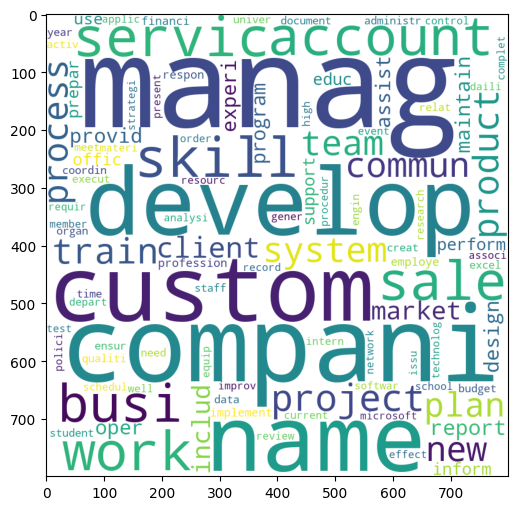

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(resumes.cResume_str)
word_cloud = WordCloud().generate(text)
word_cloud = WordCloud(width=800,height=800,background_color='white',\
                       max_words=100, random_state = 10922,\
                       stopwords =None, collocations = False).\
generate_from_text(text)
plt.figure(figsize=[6,6])
plt.imshow(word_cloud)
plt.show()

In [20]:
resumes['data_input']=resumes.apply(lambda x:'%s %s %s' % (resumes['cSummary'],resumes['cSkills'],resumes['cExperience']),axis=1)
resumes['cdata_input']=resumes.data_input.apply(clean_text_str)
x1 = from_string_vectoriser(resumes.cdata_input)

(2460, 123)
[[0.14815944 0.14815944 0.14815944 ... 0.09877296 0.04938648 0.19754592]
 [0.14815944 0.14815944 0.14815944 ... 0.09877296 0.04938648 0.19754592]
 [0.14815944 0.14815944 0.14815944 ... 0.09877296 0.04938648 0.19754592]
 ...
 [0.14815944 0.14815944 0.14815944 ... 0.09877296 0.04938648 0.19754592]
 [0.14815944 0.14815944 0.14815944 ... 0.09877296 0.04938648 0.19754592]
 [0.14815944 0.14815944 0.14815944 ... 0.09877296 0.04938648 0.19754592]]


In [21]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
# x = resumes.cResume_str
# print(x)
y = resumes.cfinalCategory
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle =False)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
# LR
modellr = LogisticRegression(max_iter=200000)
modellr.fit(X_train, y_train)
predtrain = modellr.predict(X_train)

In [23]:
print("Accuracy using LR for training is", accuracy_score(y_train,predtrain))

Accuracy using LR for training is 0.806910569105691


In [24]:
predtest = modellr.predict(X_test)
print("Accuracy using LR for test is", accuracy_score(y_test,predtest))

Accuracy using LR for test is 0.6686991869918699


In [25]:
# MLP
from sklearn.neural_network import MLPClassifier
modelmlp = MLPClassifier(activation = 'relu',hidden_layer_sizes=(10,5,10), max_iter=300000)
modelmlp.fit(X_train, y_train)
predtrain = modelmlp.predict(X_train)

In [26]:
print("Accuracy using MLP for training is", accuracy_score(y_train,predtrain))

Accuracy using MLP for training is 0.9852642276422764


In [27]:
predtest = modelmlp.predict(X_test)
print("Accuracy using MLP for test is", accuracy_score(y_test,predtest))

Accuracy using MLP for test is 0.23780487804878048


In [28]:
resumes['data_input']=resumes['cEducation']+resumes['cSkills']+resumes['cSummary']+resumes['cExperience']
print(resumes.shape)
print(resumes['Resume_html'].shape)
print(resumes['data_input'][1])
resumes['cdata_input']=resumes.data_input.apply(clean_text_str)


(2460, 18)
(2460,)
master arts corporate communication public relations sacred heart university city stateadobe photoshop adp asset management branding brochures content customer care final cut pro graphics graphic illustrator indesign innovation inventory lotus notes marketing marketing materials marketing material materials microsoft office sharepoint newsletter presentations process improvement project management promotional materials publications quality real time recruitment reporting rfp sales stories employee development video web design website articlesversatile media professional background communications marketing human resources technologycurrent specialist operations company name city state managed communication regarding launch operations group policy changes system outages designed standard work job aids create comprehensive training program new employees contractors audited job postings old pending hold draft positions audited union hourly non union hourly salary backgro

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

def calculate_cosine_similarity(doc1, doc2):
    tokens = word_tokenize(doc1)
    dict = {}
    for key, value in doc2.items():
        dict[key] = 0
    for token in tokens:
        normalized_token = token.lower()
        if normalized_token in dict:
            dict[normalized_token] += 1
        else:
            dict[normalized_token] = 1
            doc2[normalized_token] = 0
    val =1
    val1=1
    val2=1
    for key, value in doc2.items():
        if key in dict:
            val += doc2[key]*dict[key]
    for key, value in doc2.items():
        val1 += doc2[key]*doc2[key]
    for key, value in dict.items():
        val2 += dict[key]*dict[key]
    # print(val, val1, val2)
    similarity = ((val*val)/((val1)*(val2)))**0.5
    # print(doc2)
    # print(dict)
    return similarity

# similarity_score = calculate_cosine_similarity(X_test.iloc[6], lst[1])
# print(f"Cosine Similarity: {similarity_score:.4f}")


In [35]:

x1 = from_string_vectoriser(resumes.cResume_str)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
print(x1)
y = resumes.cfinalCategory
X_train, X_test, y_train, y_test = train_test_split(resumes.cResume_str, y, test_size=0.2, random_state=23000)
lst = [{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}]
for i in range(len(Category)):
    for p,q in zip(y_train, X_train):
        if p == i:
            tokens = word_tokenize(q)
            for token in tokens:
                normalized_token = token.lower()
                if normalized_token in lst[i]:
                    lst[i][normalized_token] += 1
                else:
                    lst[i][normalized_token] = 1

(2460, 27332)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
ct = 0
tot=0
for p,q in zip(y_test, X_test):
    tokens = word_tokenize(q)
    valmax=0
    k=[]
    for i in range(len(Category)):
        vali = calculate_cosine_similarity(q,lst[i])
        # print(i,j,vali)
        if valmax< vali:
            valmax = vali
            k=[i]
        elif valmax == vali:
            k.append(i)
    if p in k:
        ct +=1
    tot +=1
print("Accuracy using Cosine similarity for test data is",ct/tot)

Accuracy using Cosine similarity for test data is 0.5040650406504065


In [37]:
X_train, X_test, y_train, y_test = train_test_split(resumes.cResume_str, y, test_size=0.2)
ct = 0
tot=0
for p,q in zip(y_train, X_train):
    tokens = word_tokenize(q)
    valmax=0
    k=[]
    for i in range(len(Category)):
        vali = calculate_cosine_similarity(q,lst[i])
        # print(i,j,vali)
        if valmax< vali:
            valmax = vali
            k=[i]
        elif valmax == vali:
            k.append(i)
    if p in k:
        ct +=1
    tot +=1
print("Accuracy using Cosine similarity for training data is",ct/tot)

Accuracy using Cosine similarity for training data is 0.5889227642276422


In [38]:
# SVM
from sklearn.svm import SVC 
modelsvm = SVC(kernel='linear')
y = resumes.cfinalCategory
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 5102023)
modelsvm.fit(X_train, y_train)
predtrain = modelsvm.predict(X_train)

In [39]:
print("Accuracy using SVM for training data is", accuracy_score(y_train,predtrain))

Accuracy using SVM for training data is 0.9186991869918699


In [40]:
predtest = modelsvm.predict(X_test)
print("Accuracy using SVM for testing data is", accuracy_score(y_test,predtest))

Accuracy using SVM for testing data is 0.6239837398373984


In [41]:
%run predict_jobs.ipynb

In [42]:
print(predict_job_type(resumes.cSkills[0], resumes.Category[0], resumes.Years_of_Experience[0], resumes.cEducation[0], resumes.cSummary[0]))

Data has been written to best_predicted_jobs.csv.
           job_id  company_id                                        title  \
85139  3693066662    212201.0                ServiceNow Platform Architect   
59961  3699410802  11130470.0  HR Business Partner, Go To Market and Sales   
68872  3697385977      5353.0                              Program Advisor   
59052  3699420827      5353.0           Supervisory Operations Coordinator   
87592  3693052455    117983.0          Human Resources Manager (Bilingual)   

                                           description_x  max_salary  \
85139  Title: ServiceNow Platform Architect\nLocation...         NaN   
59961  About The Team\nOpenAI’s People team aims to h...         NaN   
68872  Summary\nAs a Program Advisor, you will indepe...         NaN   
59052  Summary\nAs a Supervisory Operations Coordinat...         NaN   
87592  Jacuzzi Group is a leading global manufacturer...         NaN   

       med_salary  min_salary pay_period formatt

C:\Users\Neha\AppData\Local\Temp\ipykernel_4568\3878718474.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Similarity_skills'] = similarity_scores
